## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 3s 13ms/step - loss: 2.2665 - accuracy: 0.1631 - val_loss: 2.2178 - val_accuracy: 0.2173
Epoch 2/500
196/196 [==============================] - 2s 13ms/step - loss: 2.1906 - accuracy: 0.2308 - val_loss: 2.1618 - val_accuracy: 0.2492
Epoch 3/500
196/196 [==============================] - 2s 13ms/step - loss: 2.1382 - accuracy: 0.2558 - val_loss: 2.1119 - val_accuracy: 0.2659
Epoch 4/500
196/196 [==============================] - 3s 13ms/step - loss: 2.0911 - accuracy: 0.2721 - val_loss: 2.0685 - val_accuracy: 0.2755
Epoch 5/500
196/196 [==============================] - 3s 13ms/step - loss: 2.0520 - accuracy: 0.2835 - val_loss: 2.0341 - val_accuracy: 0.2837
Epoch 6/500
196/196 [==============================] - 3s 13ms/step - loss: 2.0202 - accuracy: 0.2919 - val_loss: 2.0042 - val_accuracy: 0.2976
Epoch 7/500
196/196 [==============================] - 2s 13ms/step - loss: 1.9931 - accuracy: 0.3018 - val_loss: 1.9795 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 1.6612 - accuracy: 0.4217 - val_loss: 1.6667 - val_accuracy: 0.4168
Epoch 58/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6584 - accuracy: 0.4222 - val_loss: 1.6624 - val_accuracy: 0.4209
Epoch 59/500
196/196 [==============================] - 2s 13ms/step - loss: 1.6548 - accuracy: 0.4230 - val_loss: 1.6605 - val_accuracy: 0.4193
Epoch 60/500
196/196 [==============================] - 3s 13ms/step - loss: 1.6521 - accuracy: 0.4246 - val_loss: 1.6558 - val_accuracy: 0.4202
Epoch 61/500
196/196 [==============================] - 3s 13ms/step - loss: 1.6486 - accuracy: 0.4260 - val_loss: 1.6548 - val_accuracy: 0.4217
Epoch 62/500
196/196 [==============================] - 2s 13ms/step - loss: 1.6458 - accuracy: 0.4266 - val_loss: 1.6573 - val_accuracy: 0.4211
Epoch 63/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6428 - accuracy: 0.4277 - val_loss: 1.6473 - val_accuracy: 0.422

196/196 [==============================] - 3s 14ms/step - loss: 1.5225 - accuracy: 0.4681 - val_loss: 1.5436 - val_accuracy: 0.4592
Epoch 114/500
196/196 [==============================] - 3s 14ms/step - loss: 1.5209 - accuracy: 0.4687 - val_loss: 1.5453 - val_accuracy: 0.4580
Epoch 115/500
196/196 [==============================] - 3s 14ms/step - loss: 1.5186 - accuracy: 0.4702 - val_loss: 1.5402 - val_accuracy: 0.4606
Epoch 116/500
196/196 [==============================] - 3s 14ms/step - loss: 1.5167 - accuracy: 0.4713 - val_loss: 1.5394 - val_accuracy: 0.4593
Epoch 117/500
196/196 [==============================] - 3s 14ms/step - loss: 1.5152 - accuracy: 0.4709 - val_loss: 1.5378 - val_accuracy: 0.4600
Epoch 118/500
196/196 [==============================] - 3s 14ms/step - loss: 1.5131 - accuracy: 0.4718 - val_loss: 1.5357 - val_accuracy: 0.4615
Epoch 119/500
196/196 [==============================] - 3s 13ms/step - loss: 1.5114 - accuracy: 0.4727 - val_loss: 1.5353 - val_accuracy:

196/196 [==============================] - 3s 13ms/step - loss: 1.4296 - accuracy: 0.5000 - val_loss: 1.4705 - val_accuracy: 0.4790
Epoch 170/500
196/196 [==============================] - 3s 13ms/step - loss: 1.4280 - accuracy: 0.5010 - val_loss: 1.4796 - val_accuracy: 0.4760
Epoch 171/500
196/196 [==============================] - 3s 14ms/step - loss: 1.4269 - accuracy: 0.5018 - val_loss: 1.4734 - val_accuracy: 0.4753
Epoch 172/500
196/196 [==============================] - 3s 14ms/step - loss: 1.4258 - accuracy: 0.5015 - val_loss: 1.4737 - val_accuracy: 0.4793
Epoch 173/500
196/196 [==============================] - 3s 13ms/step - loss: 1.4242 - accuracy: 0.5017 - val_loss: 1.4757 - val_accuracy: 0.4782
Epoch 174/500
196/196 [==============================] - 3s 14ms/step - loss: 1.4226 - accuracy: 0.5024 - val_loss: 1.4700 - val_accuracy: 0.4818
Epoch 175/500
196/196 [==============================] - 3s 14ms/step - loss: 1.4207 - accuracy: 0.5036 - val_loss: 1.4791 - val_accuracy:

196/196 [==============================] - 3s 13ms/step - loss: 1.3533 - accuracy: 0.5272 - val_loss: 1.4246 - val_accuracy: 0.4957
Epoch 226/500
196/196 [==============================] - 3s 13ms/step - loss: 1.3521 - accuracy: 0.5274 - val_loss: 1.4170 - val_accuracy: 0.4958
Epoch 227/500
196/196 [==============================] - 3s 13ms/step - loss: 1.3507 - accuracy: 0.5283 - val_loss: 1.4267 - val_accuracy: 0.4950
Epoch 228/500
196/196 [==============================] - 3s 13ms/step - loss: 1.3492 - accuracy: 0.5275 - val_loss: 1.4216 - val_accuracy: 0.4911
Epoch 229/500
196/196 [==============================] - 3s 13ms/step - loss: 1.3473 - accuracy: 0.5298 - val_loss: 1.4180 - val_accuracy: 0.4915
Epoch 230/500
196/196 [==============================] - 3s 13ms/step - loss: 1.3467 - accuracy: 0.5291 - val_loss: 1.4206 - val_accuracy: 0.4938
Epoch 231/500
196/196 [==============================] - 3s 14ms/step - loss: 1.3456 - accuracy: 0.5300 - val_loss: 1.4155 - val_accuracy:

196/196 [==============================] - 2s 13ms/step - loss: 1.2846 - accuracy: 0.5491 - val_loss: 1.3822 - val_accuracy: 0.5050
Epoch 282/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2834 - accuracy: 0.5504 - val_loss: 1.3874 - val_accuracy: 0.5045
Epoch 283/500
196/196 [==============================] - 2s 13ms/step - loss: 1.2825 - accuracy: 0.5505 - val_loss: 1.3855 - val_accuracy: 0.5012
Epoch 284/500
196/196 [==============================] - 2s 13ms/step - loss: 1.2811 - accuracy: 0.5510 - val_loss: 1.3890 - val_accuracy: 0.5013
Epoch 285/500
196/196 [==============================] - 3s 13ms/step - loss: 1.2804 - accuracy: 0.5514 - val_loss: 1.3812 - val_accuracy: 0.5060
Epoch 286/500
196/196 [==============================] - 3s 14ms/step - loss: 1.2782 - accuracy: 0.5537 - val_loss: 1.3794 - val_accuracy: 0.5090
Epoch 287/500
196/196 [==============================] - 3s 13ms/step - loss: 1.2776 - accuracy: 0.5514 - val_loss: 1.3803 - val_accuracy:

196/196 [==============================] - 3s 13ms/step - loss: 1.2225 - accuracy: 0.5718 - val_loss: 1.3972 - val_accuracy: 0.5017
Epoch 338/500
196/196 [==============================] - 3s 13ms/step - loss: 1.2211 - accuracy: 0.5713 - val_loss: 1.3616 - val_accuracy: 0.5205
Epoch 339/500
196/196 [==============================] - 3s 13ms/step - loss: 1.2190 - accuracy: 0.5745 - val_loss: 1.3669 - val_accuracy: 0.5057
Epoch 340/500
196/196 [==============================] - 2s 13ms/step - loss: 1.2188 - accuracy: 0.5731 - val_loss: 1.3588 - val_accuracy: 0.5138
Epoch 341/500
196/196 [==============================] - 3s 13ms/step - loss: 1.2182 - accuracy: 0.5738 - val_loss: 1.3539 - val_accuracy: 0.5189
Epoch 342/500
196/196 [==============================] - 3s 13ms/step - loss: 1.2163 - accuracy: 0.5743 - val_loss: 1.3546 - val_accuracy: 0.5186
Epoch 343/500
196/196 [==============================] - 2s 13ms/step - loss: 1.2154 - accuracy: 0.5748 - val_loss: 1.3629 - val_accuracy:

196/196 [==============================] - 3s 13ms/step - loss: 1.1634 - accuracy: 0.5930 - val_loss: 1.3481 - val_accuracy: 0.5211
Epoch 394/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1617 - accuracy: 0.5929 - val_loss: 1.3442 - val_accuracy: 0.5236
Epoch 395/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1600 - accuracy: 0.5944 - val_loss: 1.3724 - val_accuracy: 0.5161
Epoch 396/500
196/196 [==============================] - 3s 14ms/step - loss: 1.1602 - accuracy: 0.5942 - val_loss: 1.3506 - val_accuracy: 0.5249
Epoch 397/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1599 - accuracy: 0.5929 - val_loss: 1.3436 - val_accuracy: 0.5219
Epoch 398/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1574 - accuracy: 0.5955 - val_loss: 1.3774 - val_accuracy: 0.5136
Epoch 399/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1575 - accuracy: 0.5956 - val_loss: 1.3453 - val_accuracy:

196/196 [==============================] - 2s 13ms/step - loss: 1.1065 - accuracy: 0.6130 - val_loss: 1.3342 - val_accuracy: 0.5247
Epoch 450/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1060 - accuracy: 0.6121 - val_loss: 1.3566 - val_accuracy: 0.5207
Epoch 451/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1070 - accuracy: 0.6136 - val_loss: 1.3296 - val_accuracy: 0.5264
Epoch 452/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1045 - accuracy: 0.6143 - val_loss: 1.3535 - val_accuracy: 0.5204
Epoch 453/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1057 - accuracy: 0.6133 - val_loss: 1.3380 - val_accuracy: 0.5269
Epoch 454/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1019 - accuracy: 0.6148 - val_loss: 1.3880 - val_accuracy: 0.5194
Epoch 455/500
196/196 [==============================] - 3s 14ms/step - loss: 1.1025 - accuracy: 0.6140 - val_loss: 1.3326 - val_accuracy:

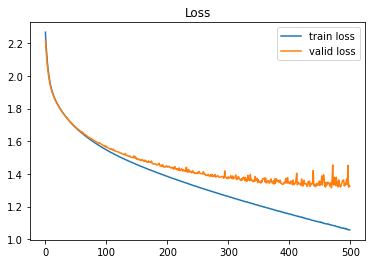

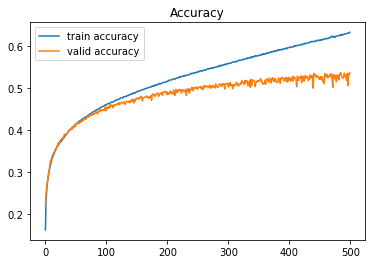

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()